<a href="https://colab.research.google.com/github/ChristianConchari/Computer-Vision-Notes/blob/master/Tutorial_9_Hough_Transform_for_Circles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 9: Hough Transform for Circles

This tutorial will complement your recently acquired knowledge about Types of Image Features and Image Transforms. The Hough transform can detect not only lines but also circles and variable shapes. It can even detect overlapped or semi-occluded objects ( when two or more objects come too close and seemingly merge or combine with each other). 

The `Hough Transform for Circles` require a grayscale image, and it'll perform edge detection by itself. The algorithm steps can be summarised as follows: 

0. Define a radius or a set of radius to explore. 
1. For each radius, create an accumulator matrix with every component initialized as 0. 
2. For each row and column in the image which has an edge, calculate the circle dots part of the circle with: $(x-x_{center})^2 + (y - y_{center})^2 = r^2$
3. Increment the respective cell in the accumulator.
4. Find and save the cells with the highest values for each radius. 
5. Display the detected circle in the original image.

### Import resources and display the image


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


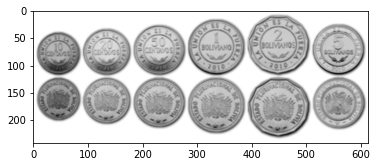

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files as FILE
import os, requests

%matplotlib inline

# Download image from the Internet
img_data = requests.get("https://www.globalexchange.es/portals/0/Images/Monedas/boliviano-monedas.jpg" , verify=False).content
with open('boliviano-monedas.jpg', 'wb') as handler:
    handler.write(img_data)

# Read in the image
image = cv2.imread('boliviano-monedas.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

# Gray and blur
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)

plt.imshow(gray_blur, cmap='gray')

## HoughCircles function

`HoughCircles` takes in a few things as its arguments:
* an input image, 8-bit, single-channel, grayscale input image.
* method, detection method(see cv.HoughModes). Currently, the only implemented method is HOUGH_GRADIENT
* dp, inverse ratio of the accumulator resolution to the image resolution. For example, if dp = 1 , the accumulator has the same resolution as the input image. If dp = 2 , the accumulator has half as big width and height.
* minDist - minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is too large, some circles may be missed.
* param1 - the higher value for performing Canny edge detection
* param2 - it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected.
* min/max radius for detected circles

The variable you should change will be the last two: min/max radius for detected circles. Take a look at the image above and estimate how many pixels the average circle is in diameter; use this estimate to provide values for min/max arguments. You may also want to see what happens if you change minDist.

Based on OpenCV documentation: https://docs.opencv.org/3.4/d3/de5/tutorial_js_houghcircles.html 

Circles shape:  (1, 12, 3)


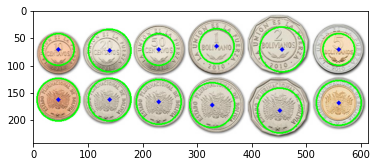

In [ ]:
# for drawing circles on
circles_im = np.copy(image)

# this section includes a form 
# for more field types, check out the next tutorial link 
# https://colab.research.google.com/notebooks/forms.ipynb#scrollTo=eFN7-fUKs-Bu

#@title Number fields
minRadius = 12 #@param {type:"slider", min:0, max:100, step:1}
maxRadius = 42 #@param {type:"slider", min:0, max:100, step:1}

circles = cv2.HoughCircles(gray_blur, 
                           cv2.HOUGH_GRADIENT, 
                           1, 
                           minDist=90,
                           param1=70,
                           param2=11,
                           minRadius=minRadius,
                           maxRadius=maxRadius)

# convert circles into expected type
circles = np.uint16(np.around(circles))
# draw each one
for circle in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(circle[0],circle[1]),circle[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(circle[0],circle[1]),2,(0,0,255),3)
    
plt.imshow(circles_im)

print('Circles shape: ', circles.shape)

### Exerice 1: Probabilistic hough transform
Day by day, many farmers around the world struggle to save water to grow their crops. Therefore, different irrigation methods were invented over the last centuries. Centre pivot irrigation uses heavy water pumps that are capable of pumping water up to 7 kilometres in a circular area. This causes the irrigated areas to come out as green circles Impressively, the radius of each circle is around 3.5 km. 

Let's imagine you were provided with a dataset of satellite images that depict sub-sections of a massive region currently raising veggies and using centre pivot irrigation. Your task is to calculate the percentage of crop fields that are not currently productive. You will have to work on the following satellite image solely but it'll give an idea of how to process multiple images in order to understand if a country's farming region is productive or not. 

Although the image also contains semi circular sections, this exercise will uniquely consider complete circle areas.

Image: 
https://drive.google.com/file/d/1HBFMUzkGrpm4pxXEHK_I6hmebWW-ZXnH/view?usp=sharing 

Ref: https://lifeinsaudiarabia.net/why-do-they-make-circular-crop-fields-in-saudi-arabia/



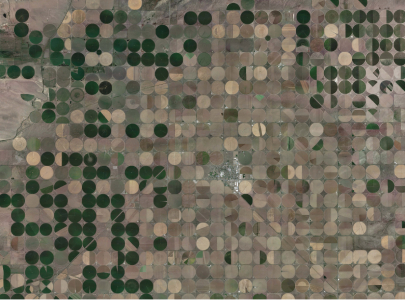

## SOLUTION:

### **Preprocessing**
First, we upload the image to our workspace from the specified url, then we convert it to grey and filter it with a Gaussian filter. Finally We resolve to use a histogram equalization in order to enhance the contrast image for posterior processing.


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


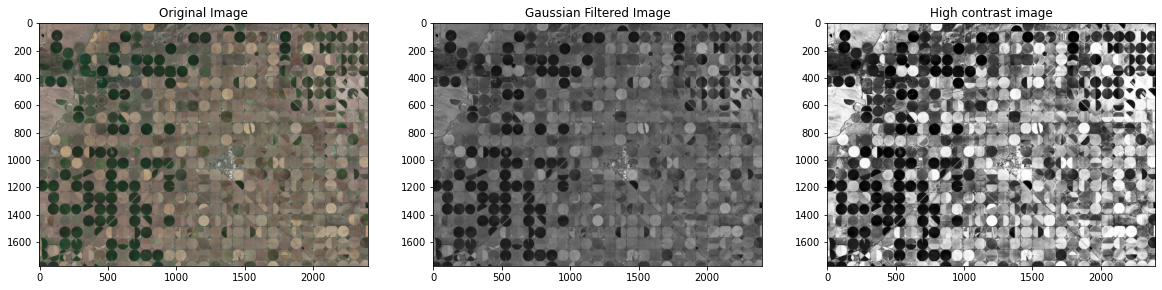

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files as FILE
import os, requests

%matplotlib inline

# Download image from the Internet
img_data = requests.get("https://i0.wp.com/coyotegulch.blog/wp-content/uploads/2019/10/image-4.jpeg?ssl=1" , verify=False).content
with open('satellite.jpeg', 'wb') as handler:
    handler.write(img_data)

# Read in the image
image = cv2.imread('satellite.jpeg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Gray and blur
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)

# Gets an equalized image
equ_image = cv2.equalizeHist(gray_blur)

f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title("Original Image")
ax1.imshow(image)
ax2.set_title("Gaussian Filtered Image")
ax2.imshow(gray_blur, cmap='gray')
ax3.set_title("High contrast image")
ax3.imshow(equ_image,cmap="gray")

plt.show()

### **Hough transform for detecting all the circles in the image**


The next step will be applying the Hough circle transform to the equalizated image. By using the circular Hough function implicitly, edge detection is also performed using the Canny algorithm.

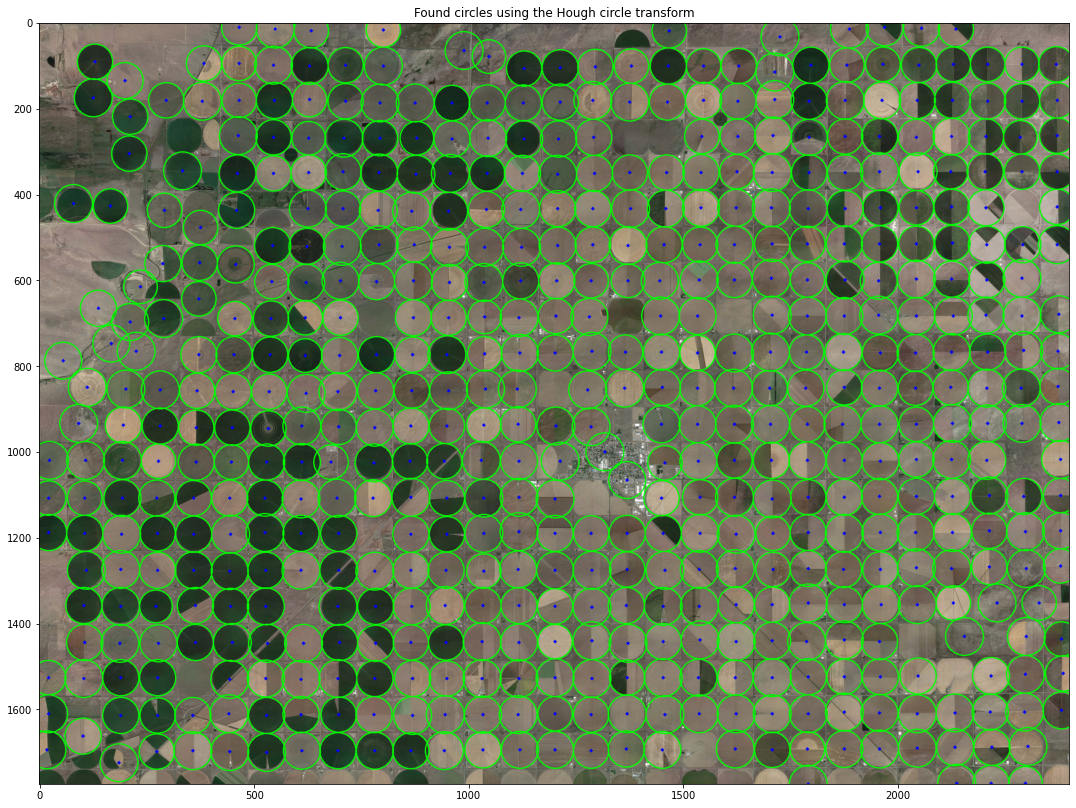

In [ ]:
# for drawing circles on
circles_im = np.copy(image)


#@title Number fields
minRadius = 38 #@param {type:"slider", min:0, max:100, step:1}
maxRadius = 45 #@param {type:"slider", min:0, max:100, step:1}

circles1 = cv2.HoughCircles(equ_image, 
                           cv2.HOUGH_GRADIENT, 
                           1, 
                           minDist=58,
                           param1=150,
                           param2=14,
                           minRadius=minRadius,
                           maxRadius=maxRadius)

# convert circles1 into expected type
circles1 = np.uint16(np.around(circles1))
# draw each one
for circle in circles1[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(circle[0],circle[1]),circle[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(circle[0],circle[1]),2,(0,0,255),3)
    
plt.figure(figsize = (140,14))  
plt.title("Found circles using the Hough circle transform")  
plt.imshow(circles_im)

In [ ]:
total_circles = circles1.shape[1]
print('Number of circles found is: ', total_circles)

Number of circles found is:  543


### Thresholding and Hough transform for detecting only green circles

To separate in a different image only the detected circles, then we will fill the detected circles with white and apply a threshold mask to keep only the white elements, the rest will turn black. Once this is done, the elements of the original image are compared with those of the mask, to generate a black background image where only the detected circles are found.

The final step will be to apply threshold once more to keep only the circular elements, which are within a range of green (productive crops).

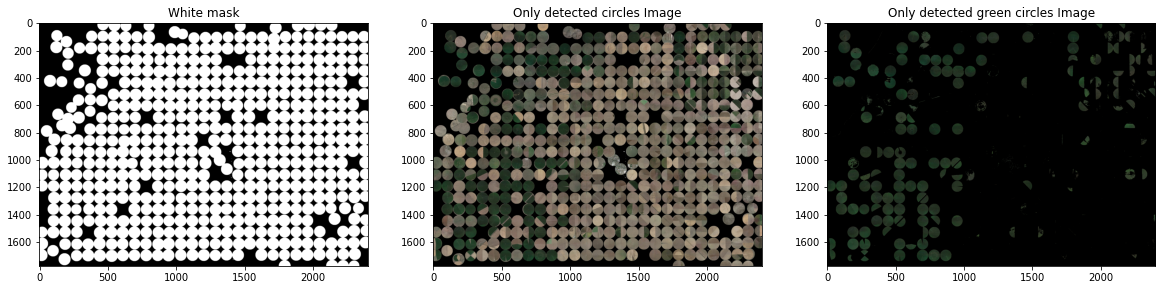

In [ ]:
circles_im2 = np.copy(image)

for circle in circles1[0,:]:
    # draw the outer circle
    cv2.circle(circles_im2,(circle[0],circle[1]),circle[2],(255,255,255),-1)
    
lower_white = np.array([250,250,250]) 
upper_white = np.array([255,255,255])  

white_mask = cv2.inRange(circles_im2, lower_white, upper_white)

only_circles = np.copy(image)

only_circles[white_mask != 255] = [0, 0, 0]

lower_green = np.array([10,30,10]) 
upper_green = np.array([60,255,60])  

mask2 = cv2.inRange(only_circles,lower_green,upper_green) 

only_green = np.copy(only_circles)

only_green[mask2 != 255] = [0,0,0]


f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title("White mask")
ax1.imshow(white_mask, cmap='gray')
ax2.set_title("Only detected circles Image")
ax2.imshow(only_circles, cmap='gray')
ax3.set_title("Only detected green circles Image")
ax3.imshow(only_green, cmap='gray')

plt.show()

Once again we will apply Hough Transform to detect only the circular elements.



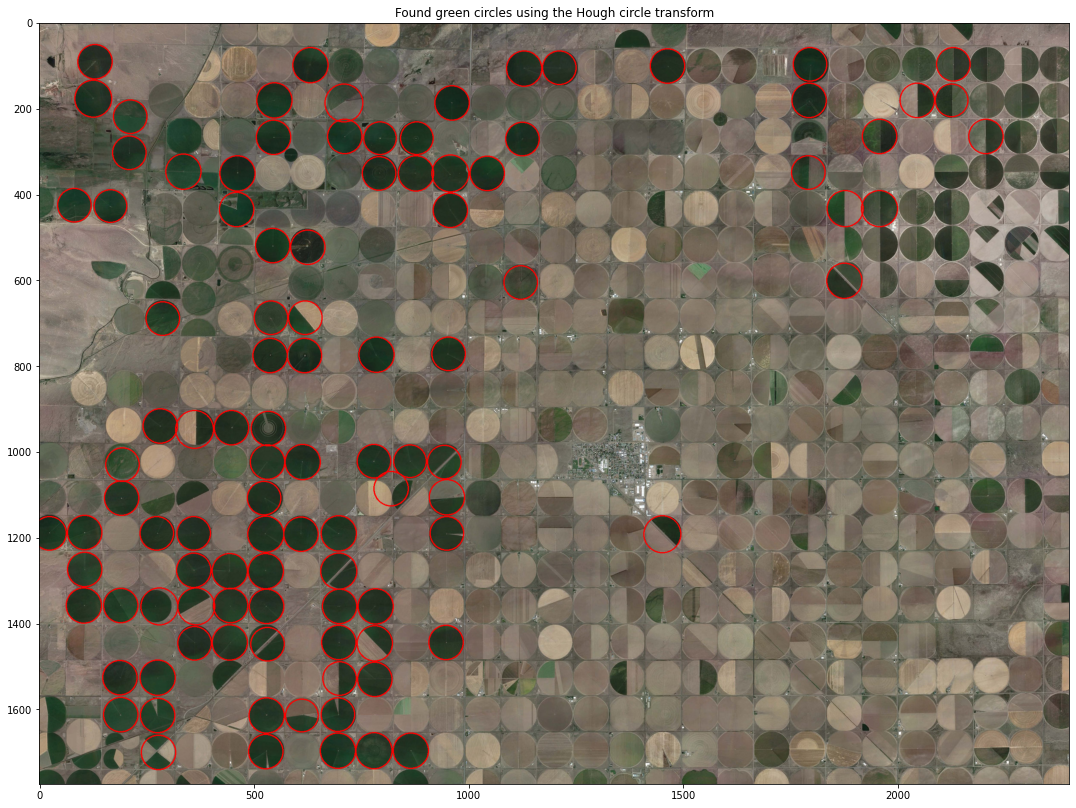

In [ ]:
only_green_gray = cv2.cvtColor(only_green,cv2.COLOR_BGR2GRAY)
only_green_gray_blur = cv2.GaussianBlur(only_green_gray, (3, 3), 0)
only_green_equ = cv2.equalizeHist(only_green_gray_blur)

# for drawing circles on
only_green_circles_im = np.copy(image)
only_green_circles_im2 = np.copy(image)


#@title Number fields
minRadius = 38 #@param {type:"slider", min:0, max:100, step:1}
maxRadius = 45 #@param {type:"slider", min:0, max:100, step:1}

circles2 = cv2.HoughCircles(only_green_equ, 
                           cv2.HOUGH_GRADIENT, 
                           1, 
                           minDist=60,
                           param1=150,
                           param2=14,
                           minRadius=minRadius,
                           maxRadius=maxRadius)

# convert circles into expected type
circles2 = np.uint16(np.around(circles2))
# draw each one
for circle in circles2[0,:]:
    # draw the outer circle
    cv2.circle(only_green_circles_im,(circle[0],circle[1]),circle[2],(255,0,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(circle[0],circle[1]),2,(0,0,255),3)

plt.figure(figsize = (140,14))  
plt.title("Found green circles using the Hough circle transform")  
plt.imshow(only_green_circles_im)

In [ ]:
green_circles =  circles2.shape[1]
print('Green circles number found is: ', green_circles)

Green circles number found is:  103


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ushort_scalars
  del sys.path[0]


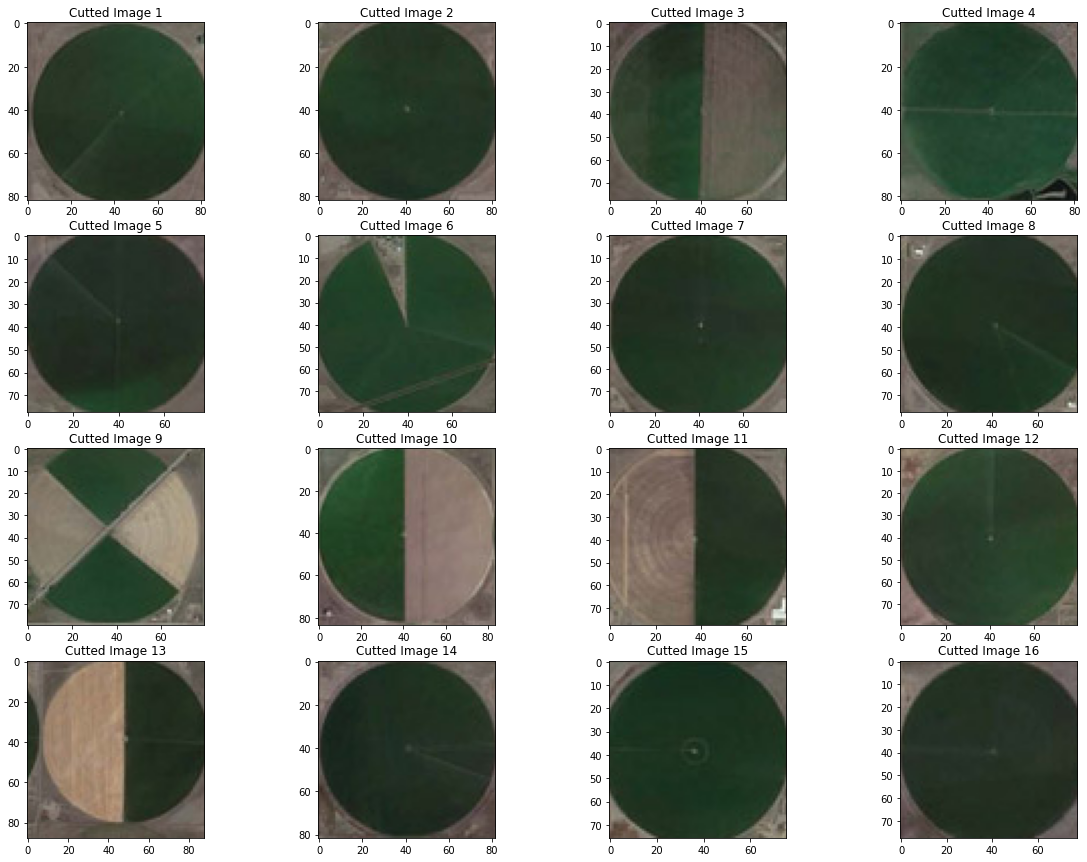

In [ ]:
import matplotlib
rows, cols, _ = only_green_circles_im.shape
cut_circles = []
for i in range(0,green_circles):
  y = circles2[0][i][0]
  x = circles2[0][i][1]
  r = circles2[0][i][2] 

  x1,y1 = np.ogrid[:rows,:cols]
    
  mask_area = (x1 - x)**2 + (y1 - y)**2 <= r**2

  aux_image = only_green_circles_im2[x-r:x+r, y-r:y+r]

  # Data [80] is incomplete
  if (i!=80):
    cut_circles.append(aux_image)
    cv2.imwrite(f'img{i}.jpg', aux_image)


f, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),
    (ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16)) = plt.subplots(4, 4, figsize=(20,15))

ax1.set_title("Cutted Image 1")
ax1.imshow(cut_circles[73])
ax2.set_title("Cutted Image 2")
ax2.imshow(cut_circles[21])
ax3.set_title("Cutted Image 3")
ax3.imshow(cut_circles[92])
ax4.set_title("Cutted Image 4")
ax4.imshow(cut_circles[60])
ax5.set_title("Cutted Image 5")
ax5.imshow(cut_circles[57])
ax6.set_title("Cutted Image 6")
ax6.imshow(cut_circles[13])
ax7.set_title("Cutted Image 7")
ax7.imshow(cut_circles[33])
ax8.set_title("Cutted Image 8")
ax8.imshow(cut_circles[64])
ax9.set_title("Cutted Image 9")
ax9.imshow(cut_circles[101])
ax10.set_title("Cutted Image 10")
ax10.imshow(cut_circles[89])
ax11.set_title("Cutted Image 11")
ax11.imshow(cut_circles[94])
ax12.set_title("Cutted Image 12")
ax12.imshow(cut_circles[12])
ax13.set_title("Cutted Image 13")
ax13.imshow(cut_circles[91])
ax14.set_title("Cutted Image 14")
ax14.imshow(cut_circles[65])
ax15.set_title("Cutted Image 15")
ax15.imshow(cut_circles[52])
ax16.set_title("Cutted Image 16")
ax16.imshow(cut_circles[75])

plt.show()

From the cropped images we can see that some are only partially green. Since we only have to take into account agricultural fields that are green for the most part, we will use a comparison parameter based on the average intensity of green pixels.

We can see:
- images 3, 9, 10, 11 and 13 are partially green.
- images 1, 2, 4, 5, 6, 7, 8, 12, 14, 15 and 16 are total or almost total green.

Therefore, to find the comparison parameter we will work with those images.


In [ ]:
partially_green = []
total_green = []

aux_cut_image_mask = cv2.inRange(cut_circles[92],lower_green,upper_green)
partially_green.append((aux_cut_image_mask==255).mean())
aux_cut_image_mask = cv2.inRange(cut_circles[101],lower_green,upper_green)
partially_green.append((aux_cut_image_mask==255).mean())
aux_cut_image_mask = cv2.inRange(cut_circles[94],lower_green,upper_green)
partially_green.append((aux_cut_image_mask==255).mean())
aux_cut_image_mask = cv2.inRange(cut_circles[89],lower_green,upper_green)
partially_green.append((aux_cut_image_mask==255).mean())

aux_cut_image_mask = cv2.inRange(cut_circles[73],lower_green,upper_green)
total_green.append((aux_cut_image_mask==255).mean())
aux_cut_image_mask = cv2.inRange(cut_circles[64],lower_green,upper_green)
total_green.append((aux_cut_image_mask==255).mean())
aux_cut_image_mask = cv2.inRange(cut_circles[57],lower_green,upper_green)
total_green.append((aux_cut_image_mask==255).mean())
aux_cut_image_mask = cv2.inRange(cut_circles[65],lower_green,upper_green)
total_green.append((aux_cut_image_mask==255).mean())

print(f'Percentage of green in partially green images array:{partially_green}')
print(f'Average percentage of green in partially green images: {round(np.mean(partially_green),3)}')
print(f'Percentage of green in totally green images array:{total_green}')
print(f'Average Percentage of green in totally green images: {round(np.mean(total_green),3)}')

Percentage of green in partially green images array:[0.41403681788297175, 0.3878125, 0.4342537804076266, 0.36422902494331066]
Average percentage of green in partially green images: 0.4
Percentage of green in totally green images array:[0.7742415229030339, 0.8372781065088757, 0.8454963839579224, 0.7694824509220702]
Average Percentage of green in totally green images: 0.807


As we can see, the percentage of green is less than 0.5 in images that are only partially green. Therefore, the following procedure will be performed to apply it to our entire dataset.

In [ ]:
green_counter = 0
green_percentage_array = []

for i in range(0,len(cut_circles)):
  aux_image = cut_circles[i]
  aux_mask = cv2.inRange(aux_image,lower_green,upper_green)
  green_percentage = (aux_mask==255).mean()
  green_percentage_array.append(green_percentage)

  if (green_percentage > 0.5):
    green_counter+=1

print(green_counter)

82


In [ ]:
framed_circles = cut_circles
for i in range(0,len(cut_circles)):
  if (green_percentage_array[i] > 0.5):
    framed_circles[i] = cv2.rectangle(cut_circles[i], (0,0), (cut_circles[i].shape[0], cut_circles[i].shape[1]), (0, 255, 0), 4) 
  else:
    framed_circles[i] = cv2.rectangle(cut_circles[i], (0,0), (cut_circles[i].shape[0], cut_circles[i].shape[1]), (255, 0, 0), 4)
  cv2.imwrite(f'img{i}.jpg', framed_circles[i])

True

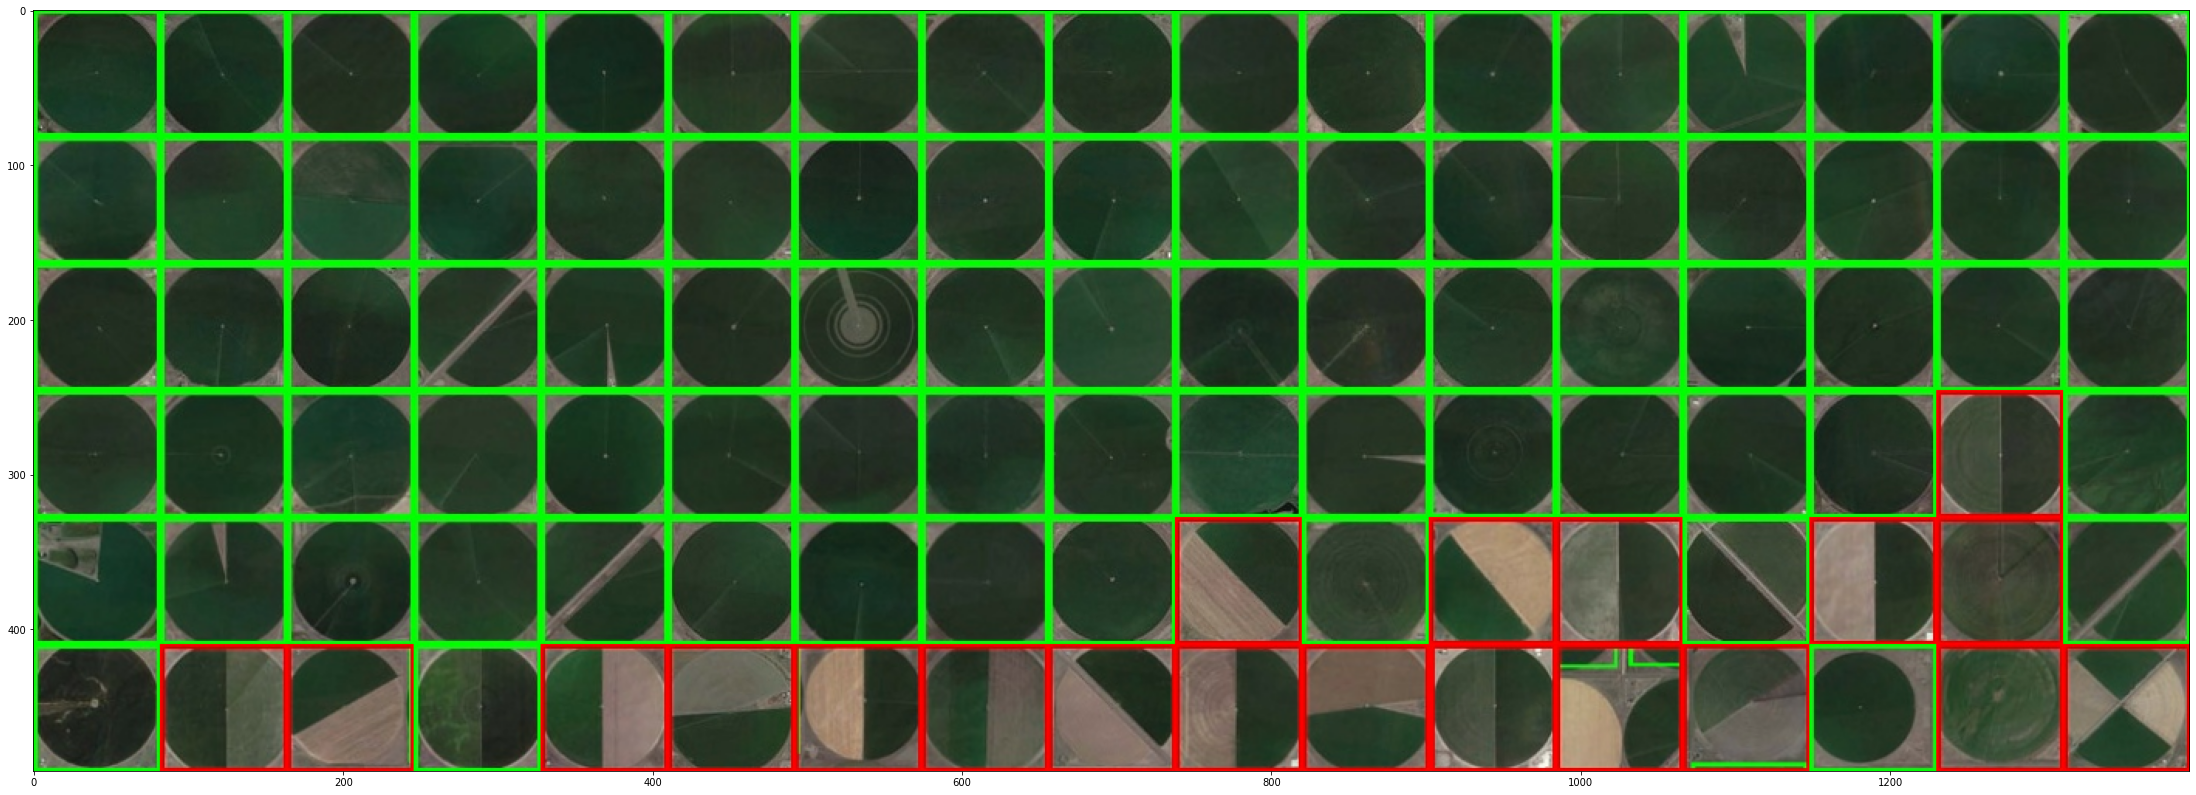

In [ ]:
c1 = cv2.imread('img0.jpg')
c1 = cv2.resize(c1, (82, 82), interpolation = cv2.INTER_AREA)
for j in range(1, 17):    
  name = 'img'+str(j)+'.jpg'
  i1 = cv2.imread(name)
  i1 = cv2.resize(i1, (82, 82), interpolation = cv2.INTER_AREA)
  c1 = cv2.hconcat([c1, i1])

c2 = cv2.imread('img17.jpg')
c2 = cv2.resize(c2, (82, 82), interpolation = cv2.INTER_AREA)
counter = 0
for j in range(18, 34):
  name = 'img'+str(j)+'.jpg'
  i1 = cv2.imread(name)
  i1 = cv2.resize(i1, (82, 82), interpolation = cv2.INTER_AREA)
  c2 = cv2.hconcat([c2, i1])

c3 = cv2.imread('img34.jpg')
c3 = cv2.resize(c3, (82, 82), interpolation = cv2.INTER_AREA)
for j in range(35, 51):
  name = 'img'+str(j)+'.jpg'
  i1 = cv2.imread(name)
  i1 = cv2.resize(i1, (82, 82), interpolation = cv2.INTER_AREA)
  c3 = cv2.hconcat([c3, i1])

c4 = cv2.imread('img51.jpg')
c4 = cv2.resize(c4, (82, 82), interpolation = cv2.INTER_AREA)
for j in range(52, 68):
  name = 'img'+str(j)+'.jpg'
  i1 = cv2.imread(name)
  i1 = cv2.resize(i1, (82, 82), interpolation = cv2.INTER_AREA)
  c4 = cv2.hconcat([c4, i1])

c5 = cv2.imread('img68.jpg')
c5 = cv2.resize(c5, (82, 82), interpolation = cv2.INTER_AREA)
for j in range(69, 85): 
  name = 'img'+str(j)+'.jpg'
  i1 = cv2.imread(name)
  i1 = cv2.resize(i1, (82, 82), interpolation = cv2.INTER_AREA)
  c5 = cv2.hconcat([c5, i1])

c6 = cv2.imread('img85.jpg')
c6 = cv2.resize(c6, (82, 82), interpolation = cv2.INTER_AREA)
for j in range(86, 102):
  name = 'img'+str(j)+'.jpg'
  i1 = cv2.imread(name)
  i1 = cv2.resize(i1, (82, 82), interpolation = cv2.INTER_AREA)
  c6 = cv2.hconcat([c6, i1])

f = cv2.vconcat([c1, c2, c3, c4, c5, c6])
plt.figure(figsize = (140,14)) 
plt.imshow(f)

cv2.imwrite('final.jpg', f)

In [ ]:
print('Green circles number found is: ', green_counter)

Green circles number found is:  82


### **Obtaining the productivity ratio of the agricultural region and final image processing results**

To obtain a productivity metric for the agricultural region, we will calculate the radius between the number of green circles, which would represent productive crops, and the total number of circles.

In [ ]:
productive = green_counter/total_circles
non_productive = 1 - productive
print(f'The percentage of crop fields that are not currently productive is: {round(non_productive*100,2)} %.')

The percentage of crop fields that are not currently productive is: 84.9 %.


With the results obtained through the processing of the satellite image of the agricultural region, with the procedure shown above, it was possible to determine a **productivity relationship of 15.1%** relating the totally green fields (produced correctly) and the non-green fields (produced incorrectly).

With the procedure carried out, we can conclude that the percentage of crop fields that are not productive is 84.9%.

----

It is possible that during the image processing regions that are not such will be detected as crop fields, this may be mainly due to the complexity of the area and the difficulty in defining the parameters for the Hough transform. In view of this, in our opinion, a better productivity metric for the region lies in calculating the number of productive cultivated fields, in this case, 82, meaning a productivity percentage of 15.1%.